<a href="https://colab.research.google.com/github/Seenuprime/Food_classifier/blob/main/model_training/Model_training(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Classifier with 20 different classes using `EfficientNetB0` Model

>> The objective of this notebook is to develop a deep learning model for image classification, leveraging transfer learning with the EfficientNetB0 architecture.

## Importing the required Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

## Loading the dataset from the kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download theeyeschico/indian-food-classification

Dataset URL: https://www.kaggle.com/datasets/theeyeschico/indian-food-classification
License(s): copyright-authors


## Unzipping the file

In [6]:
import zipfile
zip_file = zipfile.ZipFile('/content/indian-food-classification.zip')
zip_file.extractall()
zip_file.close()

## Ploting the random images of random classes

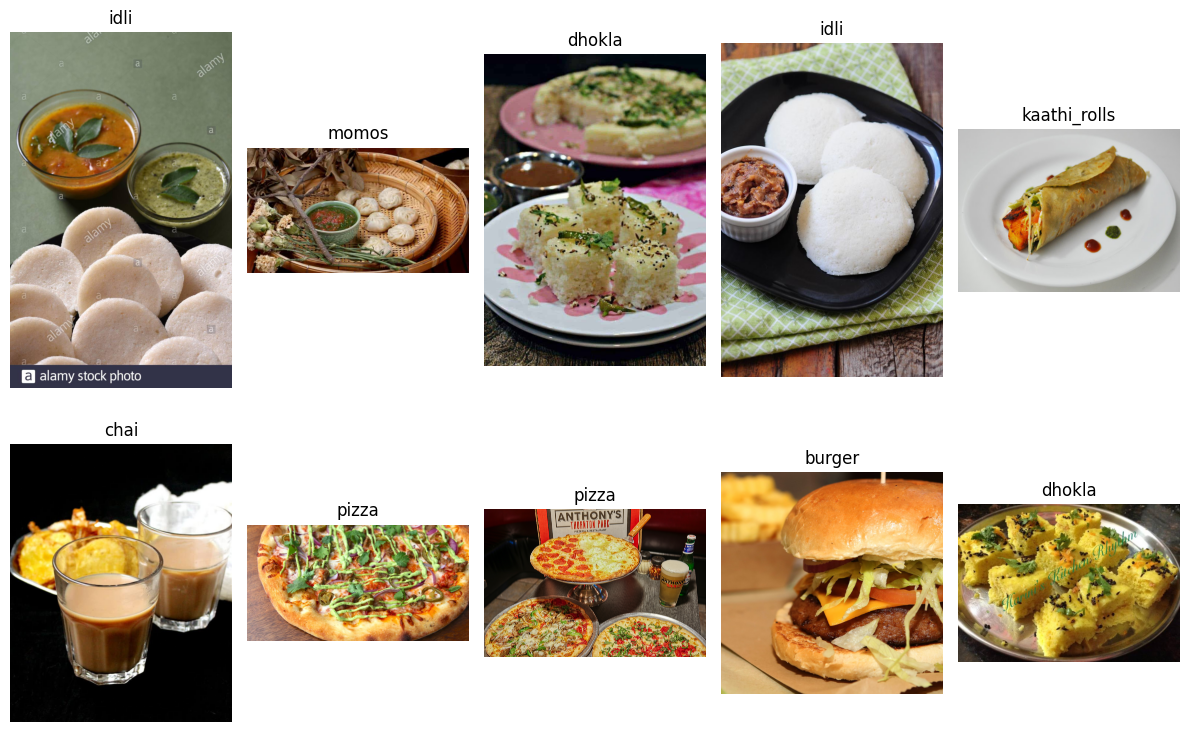

In [7]:
import os
import random

import matplotlib.pyplot as plt
from PIL import Image

train_dir = "/content/dataset/Dataset/train"
train_files = os.listdir(train_dir)

plt.figure(figsize=(12, 8))
cols, rows = 5, 2

for i in range(1, cols*rows+1):
  rand_class_folder = train_files[random.randint(0, len(train_files)-1)]
  rand_image_file = random.choice(os.listdir(os.path.join(train_dir, rand_class_folder)))

  image = Image.open(os.path.join(train_dir, rand_class_folder, rand_image_file)).convert("RGB")

  plt.subplot(rows, cols, i)
  plt.imshow(image)
  plt.axis(False)
  plt.title(rand_class_folder)

plt.tight_layout()
plt.show()

## Preprocessing the images

In [8]:
train_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(size=(336, 336), scale=(0.8, 1.0)),
        transforms.Resize((336, 336)),
        transforms.ToTensor()
    ]
)

val_transform = transforms.Compose([
    transforms.Resize((336, 336)),
    transforms.ToTensor()
])

## Loading the dataset with preprocessing

In [9]:
train_dataset = datasets.ImageFolder('/content/dataset/Dataset/train', train_transform)
val_dataset = datasets.ImageFolder('dataset/Dataset/val', val_transform)

### Loading the data and batching them

In [10]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

## Loading the `EfficientNetB0` model with pretrained as True

In [11]:
model = models.efficientnet_b0(pretrained=True)
model

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 139MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### These are the classes

In [12]:
classes = sorted(train_files.copy())
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

## Changing the model'd output number of classes, the EfficientB0 model has 1000 output classes, we have only 20 classes.

In [13]:
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(classes))
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=20, bias=True)
)

## Defining Loss and Optimizer with parsing the model parameters

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### Defining the device and transfer the model to device

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

## Training the model

In [17]:
epochs = 5
best_val_acc = 0
for epoch in range(epochs):
  model.train()
  train_loss = 0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  val_loss = 0
  total = 0
  correct = 0
  model.eval()
  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      preds = torch.max(outputs, 1)[1]

      loss = criterion(outputs, labels)
      val_loss += loss.item()

      correct += (preds == labels).sum().item()
      total += labels.size(0)

  avg_train_loss = train_loss / len(train_loader)
  avg_val_loss = val_loss / len(val_loader)

  val_accuracy = 100 * correct / total
  if best_val_acc < val_accuracy:
    best_val_acc = val_accuracy
    torch.save(model.state_dict(), 'India_food_classifier.pth')

  print(f"Epoch: {epoch+1}/{epochs} Train_loss: {avg_train_loss} Val_loss {avg_val_loss} Val_Accuracy: {val_accuracy}")
  print("Best val accuracy:", best_val_acc)

Epoch: 1/5 Train_loss: 0.07073898492846638 Val_loss 0.40488490954467127 Val_Accuracy: 90.72
Best val accuracy: 90.72
Epoch: 2/5 Train_loss: 0.14374869110435248 Val_loss 0.28331732838419155 Val_Accuracy: 91.76
Best val accuracy: 91.76
Epoch: 3/5 Train_loss: 0.06358801134116948 Val_loss 0.278523275090879 Val_Accuracy: 92.0
Best val accuracy: 92.0
Epoch: 4/5 Train_loss: 0.08450586724933237 Val_loss 0.2779315365027287 Val_Accuracy: 91.6
Best val accuracy: 92.0
Epoch: 5/5 Train_loss: 0.04933951903972775 Val_loss 0.2887723256295402 Val_Accuracy: 91.92
Best val accuracy: 92.0


## Loading the test data, with same augmentation as validatation data

In [18]:
test_dataset = datasets.ImageFolder('test', val_transform)
test_loader = DataLoader(test_dataset, batch_size=32)

## Testing the model with test dataset

In [19]:
total = 0
correct = 0
model.eval()
with torch.no_grad():
  for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)

    outputs = model(images)
    preds = torch.max(outputs, 1)[1]

    correct += (preds == labels).sum().item()
    total += labels.size(0)

accuracy = 100 * correct / total
print(accuracy)

91.92


## model testing with ploting images

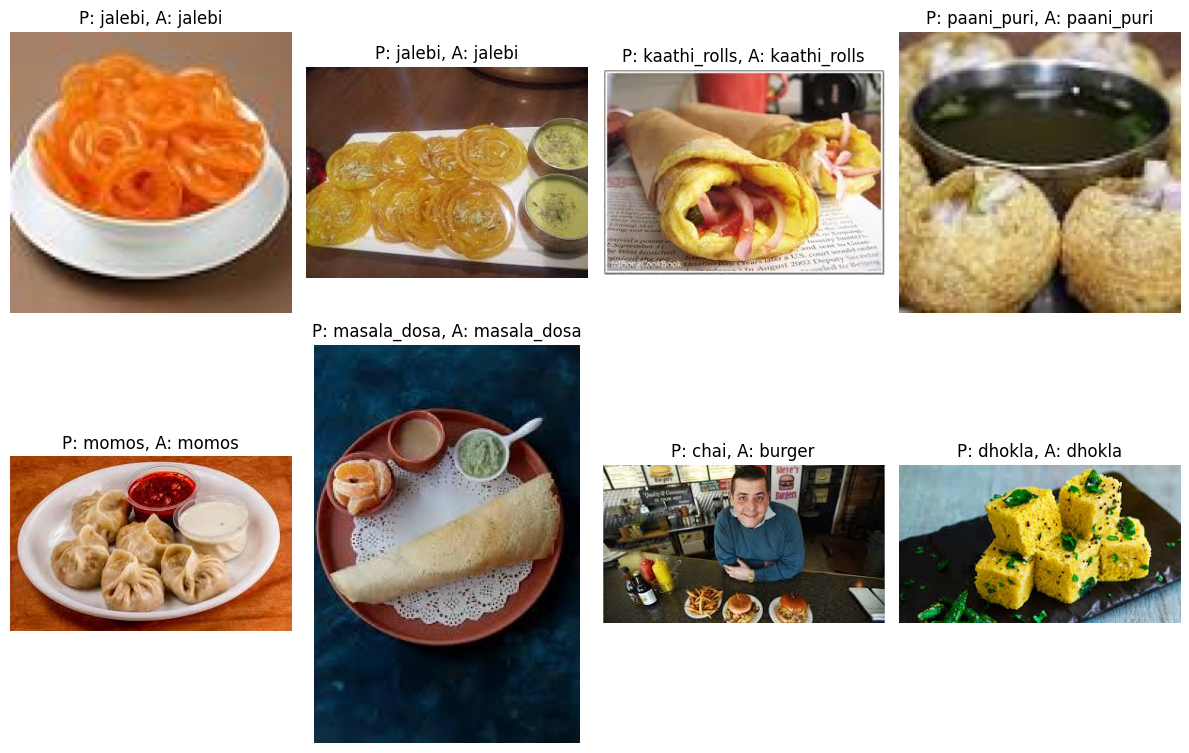

In [31]:
test_dir = "test"
test_files = os.listdir(test_dir)

plt.figure(figsize=(12, 8))
cols, rows = 4, 2

for i in range(1, cols*rows+1):
  rand_class_folder = test_files[random.randint(0, len(test_files)-1)]
  rand_image_file = random.choice(os.listdir(os.path.join(test_dir, rand_class_folder)))

  image = Image.open(os.path.join(test_dir, rand_class_folder, rand_image_file)).convert("RGB")

  input_tensor = val_transform(image).to(device)
  output = model(torch.unsqueeze(input_tensor, 0))
  pred = classes[torch.max(output, 1)[1]]

  plt.subplot(rows, cols, i)
  plt.imshow(image)
  plt.axis(False)
  plt.title(f"P: {pred}, A: {rand_class_folder}")

plt.tight_layout()
plt.show()